Author:  Raphael Cousin

Project: https://github.com/racousin/algorithms_basics_python

# Theory

__Context:__

* Data : $X_1,..,X_n \sim f$ where $f$ is a density with support $I = [a,b]$ 

* Decomposition : $\forall x \in I, f(x)=\sum_{j=0}^\infty <f,\psi_j>\psi_j(x)$, with $(\psi_m)_{m \in \mathbb{N}}$ b.o.n of $I$ and

* estimator: $\hat{f}_m(x)= \sum_{j=0}^m \hat{a}_j \psi_j(x)$, with $\hat{a}_j = \frac{1}{n} \sum_{i=1}^n \psi_j(X_i)$ $\sim E[\psi_m(X)] = <\psi_m,f>$

* sample size: $n$

In [1]:
from scipy.stats import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.discriminant_analysis import LinearClassifierMixin

In [2]:
np.random.seed(seed=233423)
n = 10000
gauss = norm(loc=0, scale=1)
rnorm = lambda n : gauss.rvs(n)
runif = lambda n: uniform(loc=-np.pi, scale=2*np.pi).rvs(n)

In [3]:
class projection(BaseEstimator, LinearClassifierMixin):
    def __init__(self, m = 20, base='trigo'):
        self.f_hat = None
        self.m = m
        self.f_base = None
        self.f_four = None
        if base == 'trigo':
            self.f_base = lambda x,j : np.c_[np.cos(-j*x), np.sin(j*x)]
            self.f_four = lambda x,j : np.c_[np.cos(j*x), np.sin(j*x)]
    def fit(self, X, fX):
        coeff = []
        def f_hat(xs):
            res = np.zeros(shape=(len(xs), 2 * self.m + 1));
            for _,m in enumerate(np.arange(-self.m, self.m + 1)):
                res[:,_] = self.f_four(xs,m).dot((fX[:,np.newaxis]*(self.f_base(X,m))).mean(axis=0))
            return res.sum(axis=1)
        self.f_hat = f_hat
        
    def predict(self, x):
        return self.f_hat(x)
    

    def plot(self, X):
        return np.sign(self.decision_function(X))

In [4]:
X = runif(n)
X.sort()
#X = rnorm(n)
fX = np.sin(X) + np.cos(X)-2 * np.sin(4*X) + rnorm(n)
proj = projection()
proj.fit(X, fX)
xs = np.linspace(X.min(),X.max(),300)

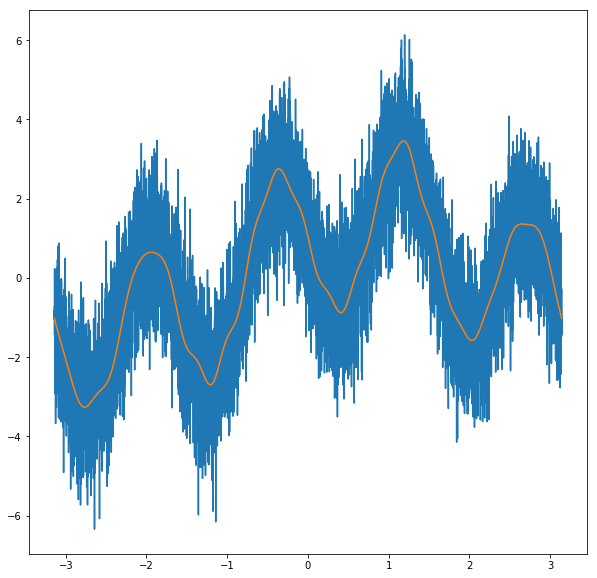

In [5]:
fig,ax = plt.subplots(figsize = (10,10))
ax.plot(X, fX)
ax.plot(xs, proj.predict(xs))

### Haar system

$V_j = \{f \in L^2(\mathbb{R})~|~\forall k \in \mathbb{Z}, \forall x \in ]k2^{-j}, (k+1)2^{-j}[: f(x) = c_k\}$

$(\phi_{jk})_{k \in \mathbb{Z}} = \{\psi_{jk}(x) \mathbb{1}[k2^{-j}, (k+1)2^{-j}]\}_{k \in \mathbb{Z}}$

$\psi(x) = \mathbb{1}[0,0.5] - \mathbb{1}[0.5,1]$

$\psi_{jk}(x) = 2^{j/2} \psi(2^j x - k)$

* estimator: $\hat{f}_m(x)= \sum_{j=0}^m \hat{a}_j \psi_j(x)$, with $\hat{a}_j = \frac{1}{n} \sum_{i=1}^n \psi_j(X_i)$ $\sim E[\psi_m(X)] = <\psi_m,f>$

In [14]:
def mother(t):
    res = np.zeros(len(t));
    res[(t>0) & (t < 0.5)] = 1
    res[(t>0.5) & (t < 1)] = -1
    return res;

def fhaar(t,j,k):
    res = np.zeros(len(t));
    ind = (t > k * 2 **-j) & (t < (k+1) * 2 **-j)
    res[ind] = 2**(j/2) * mother(2**j * t[ind] - k)
    return res;

In [15]:
ts = np.linspace(-10,10,1000)
ns = np.arange(-10,10, dtype=float)
ks = np.arange(-10,10, dtype=float)

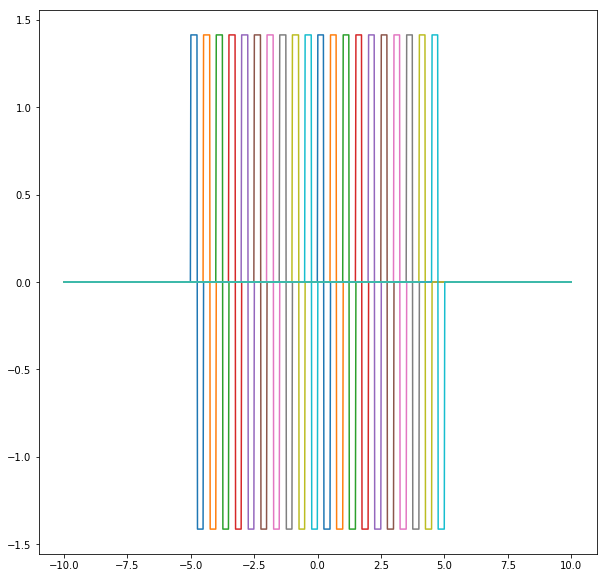

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
for n in ns:
    ax.plot(ts,fhaar(ts,1,n))

In [186]:
j = -100
n = 1000
Z = 400

In [183]:
xs = np.linspace(-np.pi,np.pi,n)
#xs = np.random.normal(size=1000)
ks = np.arange(-Z,Z)
#f = np.sin(xs)
f = lambda x : np.sin(x)
fs = f(xs)
ahat = np.zeros(len(ks))
for i,k in enumerate(ks):
    ahat[i] = fs.dot(fhaar(xs,j,k))/np.sqrt(n)

In [187]:
def fhat(x):
    tmp = np.asarray([fhaar(x,j,k) for k in ks])
    return ahat.dot(tmp)

In [184]:
#xss = np.linspace(-2*np.pi,2*np.pi,3*n)

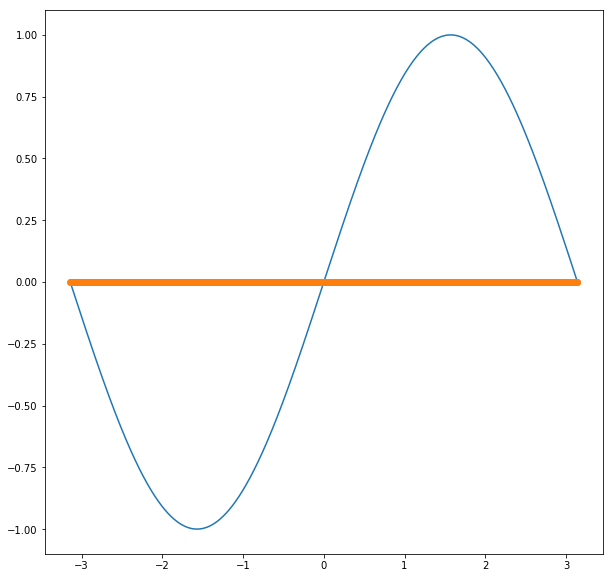

In [188]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(xs,f(xs))
ax.plot(xs,fhat(xs),'o')

In [ ]:
function (n) 
{
    J = log(n)/log(2)
    V11 = matrix(c(1, 1), 1, 2)
    V1m1 = matrix(c(1, -1), 1, 2)
    H = matrix(c(1, 1, 1, -1), 2, 2, byrow = TRUE)
    if (J > 1) {
        for (j in 1:(J - 1)) {
            H = rbind(kronecker(H, V11), kronecker(diag(2^j), 
                V1m1))
        }
    }
    normH = sqrt(rowSums(H^2))
    return(t(diag(1/normH) %*% H))
}

In [ ]:
def = mathaar(n):
    res = np.zeros(shape=(n,n))
    J = int(log(n) / log(2))
    V11 = np.asarray([[1,1]])
    V1m1 = np.asarray([[1,-1]])
    H = np.asarray([[1,1],[1,-1]])
    if J > 1:
        for j in range(J):
            H  = np.kron(H, V11), np.kron()